<a href="https://colab.research.google.com/github/Debanil1996/Python-AI-Practice/blob/master/Numpy_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from pylab import *


# Extracting Data
#### ABS (Air Bus System)

Here we have 3 csv files corresponding to the architecture [architecturelink](./Revised%20V1%20toV2%20Flow%20in%20Production-Activation%20Flow.jpg)

1. ABS Activation DataFile
1. ABS Movements DataFile
1. ABS Prospects DataFile
1. ABS Vehicles DataFile 

In [3]:
vehiclesdf = pd.read_csv('./vams.vehicles.csv',low_memory=False)
prospectsdf = pd.read_csv('./vams.prospects.csv',low_memory=False)
activationsdf = pd.read_csv('./vams.activations.csv',low_memory=False)
movementsdf = pd.read_csv('./vams.activations.csv',low_memory=False)



### Analysis of HP Days in Vehicles
HP Days are also called Horse Power Days Which Determines the vehicles used had how much the vehicles have been used


### Normal Distribution Graph

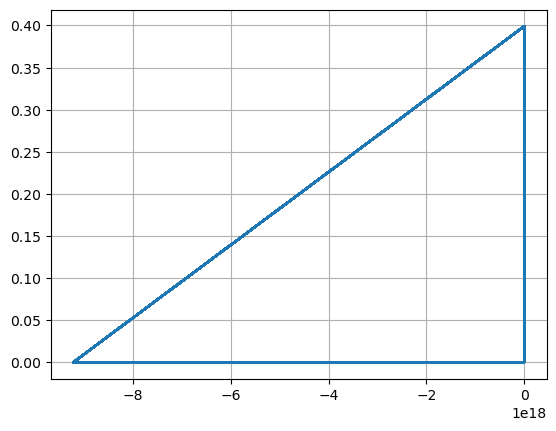

In [4]:
from scipy.stats import norm
hpDays = np.array(vehiclesdf['hpDays'],dtype=int)
axes = plt.axes()
axes.grid()
plt.plot(hpDays,norm.pdf(hpDays))
plt.show()

<AxesSubplot: xlabel='documentStatus'>

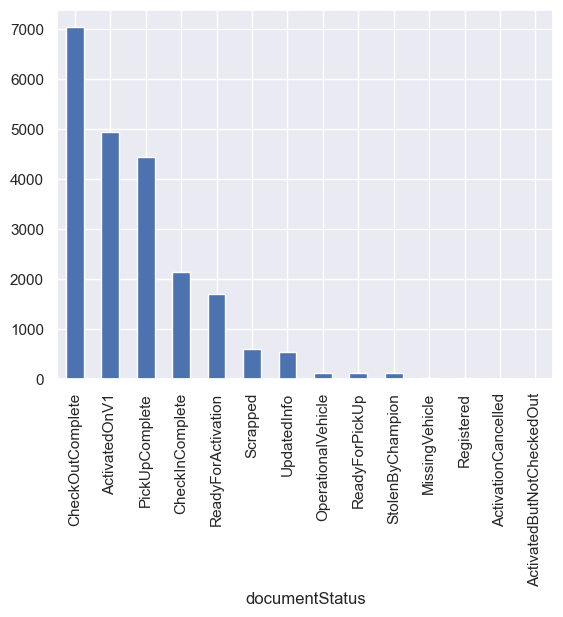

In [5]:
sns.set()
documentStatus = vehiclesdf['documentStatus'].value_counts()
documentStatus.plot(kind='bar')

### Analysis

From the Bar Graph you are exploring denotes the number of Vehicles which are having statuses as **ActivatedOnV1**.

From Architecture :

The Company is based on Two Systems which are using Sql Database(which we call as Version 1(V1) System) and MongoDB Database (which we call as Version 2(V2) System) .  

Here We can see that ActivatedOnV1 system is majorly used where manual updates over the system has been done to keep the business Running .

We can see that CheckOutComplete is far the most corresponding to the other statuses

The other Status like :
1. PickUpComplete -  It is the period when the vehicle is taken from the premises
1. ReadyForActivation - It is when the vehicle is binded with the champion . 
1. CheckOutComplete - It is status when vehicle is moved out from premises to customer which is opposite of CheckInComplete.
1. UpdatedInfo - It is the status when vehicle is installed with tracker and Devices
1. CheckInComplete - It is the vehicle brought back to the premises when the champions is fixed
1. Scrapped - These are vehicles which are removed by the Business .

<AxesSubplot: xlabel='helmetNumber', ylabel='Count'>

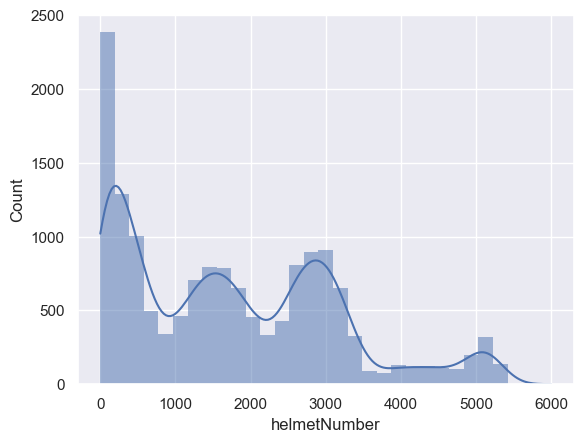

In [6]:
sns.histplot(activationsdf['helmetNumber'] , kde=True, linewidth=0)

## Analysis

From the analysis graph I can see that the helmet numbers are quite higher in middle then the numbers are decreased . 

In [7]:
vehiclesdf_filtered = vehiclesdf.loc[vehiclesdf['hpv.value'].notna()]
activationsdf_filtered = activationsdf.loc[activationsdf['paymentInfo'].notna()]
mergedData = pd.merge(activationsdf_filtered,vehiclesdf_filtered,how='inner',on='vehicle_id')
# mergedData['nameOfFleetOfficer']

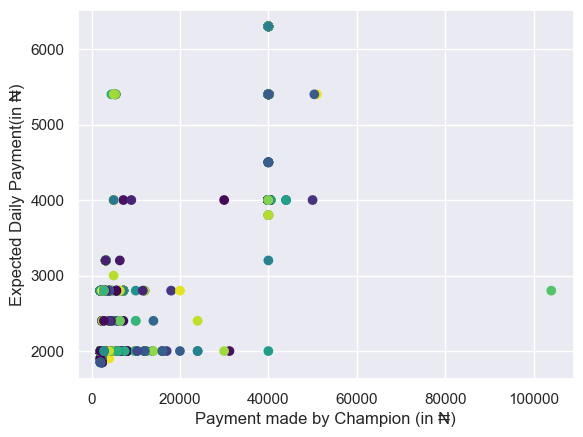

In [8]:

paymentDoneByChampion = np.array(mergedData['paymentInfo'].str.extract('(\d+)')[0],dtype=int)
expectedPayment = np.array(mergedData['hpv.daily_remit'])
num_points = len(expectedPayment)
color_values = np.random.rand(num_points)  
norm = colors.Normalize(color_values.min(), color_values.max())
cmap = plt.cm.get_cmap('viridis')

plt.scatter(paymentDoneByChampion,expectedPayment,c=color_values,cmap=cmap,norm=norm,marker='o')
plt.xlabel('Payment made by Champion (in ₦)')
plt.ylabel('Expected Daily Payment(in ₦)')
plt.show()

In [9]:
def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

## Analysis

From the Diagram Above here depicts a scattered graph to showcase the amount Spent by Champion to Vams Business . 

The Scenario am portraying in the following
 - The prospect comes into ABS Facility to take a Vehicle for rental
 - The Prospect signs a contract For the Vehicle and comes to pickup the Vehicle . 
 - After all the procedures are met , the prospect need to give a down payment or a standard remittence payment
 - If the payment is not according to the said daily payment the vehicle will be revoked .
 - Some prospects give excess amount . This amount is readjusted for the next daily payments
 - After the payments and contract signed . The Prospect Converts to Champion to take the vehicle out from ABS Premises .

So from here we can see that there is an ample number of vehicles that have paid greater than the said amount which is adjusted . 

Density of less payment by champion is more dense as compared to full payment

### Covariance

Here the value of the Mean of Expected Payment differs from the Mean of Payment Done By Champion

In [10]:
cov1 =covariance(paymentDoneByChampion,expectedPayment)
cov2 = np.cov(paymentDoneByChampion,expectedPayment)
print('\n Using HardWay \n',cov1)
print('\n Using Soft Way \n',cov2)


 Using HardWay 
 10241477.891401244

 Using Soft Way 
 [[1.71509711e+08 1.02414779e+07]
 [1.02414779e+07 8.13282714e+05]]


## Correlation Analysis

Here we are showcasing the brute force method of correlation and the use of numpy package for correlation of Payment done by Champion verses Expected Daily Payment By Champion

In [11]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy
    
# Using Hard Way 
hardway = correlate(paymentDoneByChampion,expectedPayment)
print("\nHardway \n",hardway)

# Using the library Way
libraryway = np.corrcoef(paymentDoneByChampion, expectedPayment)
print("\nLibrary Way \n",libraryway)



Hardway 
 [1.016248e+11]

Library Way 
 [[1.         0.86715654]
 [0.86715654 1.        ]]


# Predictive Models



In [12]:
from scipy import stats

slope , intercept, r_value, p_value, std_err  = stats.linregress(paymentDoneByChampion, expectedPayment)

In [13]:
r_value**2

0.7519604656232021

## Linear Regression Analysis 

In the figure below for Regression Analysis we can see that the points are scattered all over the straight line . 

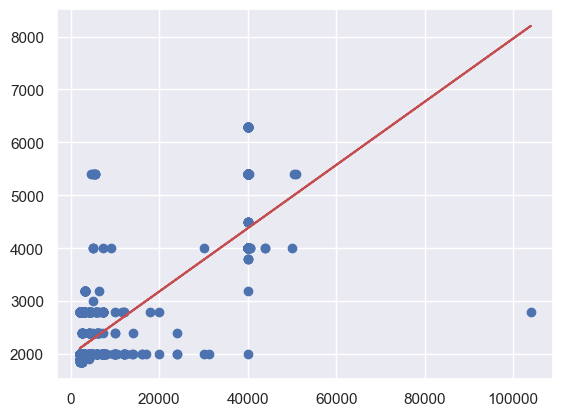

In [14]:
import matplotlib.pyplot as plt 

def predict(x):
    return slope * x + intercept

fitline = predict(paymentDoneByChampion)

plt.scatter(paymentDoneByChampion,expectedPayment)
plt.plot(paymentDoneByChampion, fitline , c = 'r')
plt.show()

## Polynomial Regression Analysis



Here in the analysis of Polynomial Regression can see the data points are not aligning with Predicted Data
The graph indicates the underfitting of Data .

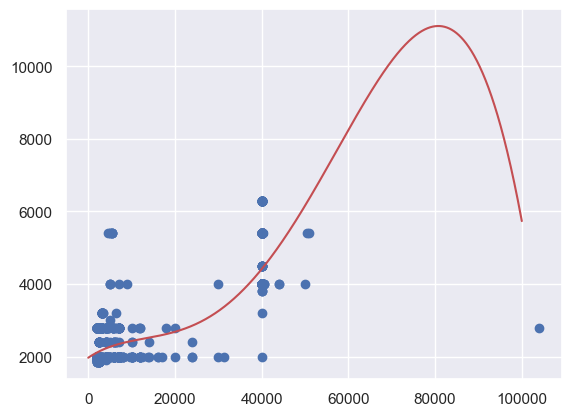

In [15]:
x = np.array(paymentDoneByChampion)
y = np.array(expectedPayment)
polynomial4 =  np.poly1d(np.polyfit(x, y,4))

xp = np.linspace(0,100000,2000)
plt.scatter(x,y)
plt.plot(xp,polynomial4(xp),c='r')
plt.show()

### R Squared Value
An R-squared value of 0.766 suggests that approximately 76.6% of the variance in the dependent variable can be explained by the independent variable(s) .

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y,polynomial4(x))

print(r2)


0.7663661474503727
